In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from gym_pendulum import gym_pendulum_class
import time

In [3]:
p = gym_pendulum_class()

In [22]:
M = 30.0
L = 5.21*2
p.ini({'M':M,'L':L,'theta_m':np.deg2rad(0)},-1.0)
p.report_x()
p.report_y()
p.report_u()
p.report_z()

Input or parameter theta_m not found.
theta =  0.00
omega =  0.00
theta_m =  0.00
tau   =  0.00
tau_ref =  0.00
theta =  0.00


In [40]:
p.ini({'M':M,'L':L,'theta_m':np.deg2rad(0)},-1.0)
p.xy[0] = 1.0
p.xy[1] = 0.0
p.run(10.0,{'tau_ref':0.0})
p.post()

Input or parameter theta_m not found.


Text(0, 0.5, '$\\theta (º)$')

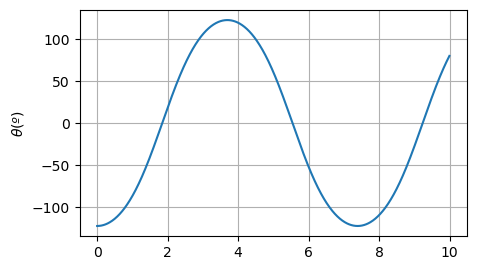

In [41]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot(p.Time, np.rad2deg(p.get_values('theta'))-180, label=f'$\theta$')
axes.grid()
axes.set_ylabel('$\\theta (º)$')

In [3]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path


class PendulumEnv(gym.Env):

    metadata = {"render.modes": ["human", "rgb_array"], "video.frames_per_second": 30}

    def __init__(self, g=10.0):
        self.max_speed = 8
        self.max_torque = 2.0
        self.dt = 0.05
        self.g = g
        self.m = 1.0
        self.l = 1.0
        self.viewer = None

        high = np.array([1.0, 1.0, self.max_speed], dtype=np.float32)
        self.action_space = spaces.Box(
            low=-self.max_torque, high=self.max_torque, shape=(1,), dtype=np.float32
        )
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)

        self.seed()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, u):
        th, thdot = self.state  # th := theta

        g = self.g
        m = self.m
        l = self.l
        dt = self.dt

        u = np.clip(u, -self.max_torque, self.max_torque)[0]
        self.last_u = u  # for rendering
        costs = angle_normalize(th) ** 2 + 0.1 * thdot ** 2 + 0.001 * (u ** 2)

        newthdot = thdot + (3 * g / (2 * l) * np.sin(th) + 3.0 / (m * l ** 2) * u) * dt
        newthdot = np.clip(newthdot, -self.max_speed, self.max_speed)
        newth = th + newthdot * dt

        self.state = np.array([newth, newthdot])
        return self._get_obs(), -costs, False, {}

    def reset(self):
        high = np.array([np.pi, 1])
        self.state = self.np_random.uniform(low=-high, high=high)
        self.last_u = None
        return self._get_obs()

    def _get_obs(self):
        theta, thetadot = self.state
        return np.array([np.cos(theta), np.sin(theta), thetadot], dtype=np.float32)

    def render(self, mode="human"):
        if self.viewer is None:
            from gym.envs.classic_control import rendering

            self.viewer = rendering.Viewer(500, 500)
            self.viewer.set_bounds(-2.2, 2.2, -2.2, 2.2)
            rod = rendering.make_capsule(1, 0.2)
            rod.set_color(0.8, 0.3, 0.3)
            self.pole_transform = rendering.Transform()
            rod.add_attr(self.pole_transform)
            self.viewer.add_geom(rod)
            axle = rendering.make_circle(0.05)
            axle.set_color(0, 0, 0)
            self.viewer.add_geom(axle)
            fname = 'clockwise.png'
            self.img = rendering.Image(fname, 1.0, 1.0)
            self.imgtrans = rendering.Transform()
            self.img.add_attr(self.imgtrans)

        self.viewer.add_onetime(self.img)
        self.pole_transform.set_rotation(self.state[0] + np.pi / 2)
        if self.last_u is not None:
            self.imgtrans.scale = (-self.last_u / 2, np.abs(self.last_u) / 2)

        return self.viewer.render(return_rgb_array=mode == "rgb_array")

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None


def angle_normalize(x):
    return ((x + np.pi) % (2 * np.pi)) - np.pi

In [4]:
env = PendulumEnv()


In [5]:
env.reset()

array([ 0.262571  , -0.96491265,  0.8726774 ], dtype=float32)

In [36]:
obs, reward, done, info = env.step(np.array([1.0]))
obs

array([ 0.5519726, -0.8338622,  0.2636646], dtype=float32)

In [49]:
t_0 = time.time()
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    for it in range(100):
        #env.render()
        action = np.array([random.choice([0,1])])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
print(time.time()-t_0)


Episode:1 Score:-772.7243145157431
Episode:2 Score:-566.2064179803667
Episode:3 Score:-638.8965633039352
Episode:4 Score:-637.1301825424302
Episode:5 Score:-760.7941867324757
Episode:6 Score:-608.4172013756653
Episode:7 Score:-888.5511003556189
Episode:8 Score:-907.7628565459669
Episode:9 Score:-493.7177189297075
Episode:10 Score:-844.9687582692325
0.2563142776489258


In [50]:
p_gym.render()

NameError: name 'p_gym' is not defined

In [ ]:
env.close()

In [5]:
class PendulumEnv2(gym.Env):

    metadata = {"render.modes": ["human", "rgb_array"], "video.frames_per_second": 30}

    def __init__(self, g=10.0):
        self.max_speed = 8
        self.max_torque = 2.0
        self.dt = 0.05
        self.g = g
        self.m = 1.0
        self.l = 1.0
        self.viewer = None
        self.t = 0.0
        

        high = np.array([1.0, 1.0, self.max_speed], dtype=np.float32)
        self.action_space = spaces.Box(
            low=-self.max_torque, high=self.max_torque, shape=(1,), dtype=np.float32
        )
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)

        self.seed()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, u):
        th, thdot = self.state  # th := theta

        g = self.g
        m = self.m
        l = self.l
        dt = self.dt
        
        self.t += dt

        #u = np.clip(u, -self.max_torque, self.max_torque)[0]
        u = np.clip(u, -self.max_torque, self.max_torque)

        self.last_u = u  # for rendering
        costs = angle_normalize(th) ** 2 + 0.1 * thdot ** 2 + 0.001 * (u ** 2)

        self.model.run(self.t,{'tau_ref':u})
        newth = self.model.xy[0]
        newthdot = self.model.xy[1]

        self.state = np.array([newth, newthdot])
        return self._get_obs(), -costs, False, {}

    def reset(self):
        high = np.array([np.pi, 1])
        
        self.model = gym_pendulum_class()

        self.model.ini({'M':self.m,'L':self.l,'G':self.g},-1.0)
        self.model.Dt = 0.01

        self.state = self.np_random.uniform(low=-high, high=high)
        self.model.xy[0] = self.state[0]
        self.model.xy[1] = self.state[1]       
        
        self.t = 0.0

        self.last_u = None
        return self._get_obs()

    def _get_obs(self):
        theta, thetadot = self.state
        return np.array([np.cos(theta), np.sin(theta), thetadot], dtype=np.float32)

    def render(self, mode="human"):
        if self.viewer is None:
            from gym.envs.classic_control import rendering

            self.viewer = rendering.Viewer(500, 500)
            self.viewer.set_bounds(-2.2, 2.2, -2.2, 2.2)
            rod = rendering.make_capsule(1, 0.2)
            rod.set_color(0.8, 0.3, 0.3)
            self.pole_transform = rendering.Transform()
            rod.add_attr(self.pole_transform)
            self.viewer.add_geom(rod)
            axle = rendering.make_circle(0.05)
            axle.set_color(0, 0, 0)
            self.viewer.add_geom(axle)
            fname = 'clockwise.png'
            self.img = rendering.Image(fname, 1.0, 1.0)
            self.imgtrans = rendering.Transform()
            self.img.add_attr(self.imgtrans)

        self.viewer.add_onetime(self.img)
        self.pole_transform.set_rotation(self.state[0] + np.pi / 2)
        if self.last_u is not None:
            self.imgtrans.scale = (-self.last_u / 2, np.abs(self.last_u) / 2)

        return self.viewer.render(return_rgb_array=mode == "rgb_array")

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None


def angle_normalize(x):
    return ((x + np.pi) % (2 * np.pi)) - np.pi

In [6]:
env2 = PendulumEnv2()
env2.reset()

array([ 0.6293232, -0.7771437,  0.2720431], dtype=float32)

In [7]:
t_0 = time.time()
episodes = 10
for episode in range(1, episodes+1):
    state = env2.reset()
    done = False
    score = 0 
    
    for it in range(100):
        env2.render()
        action = np.array([random.choice([-1,0,1])])
        n_state, reward, done, info = env2.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

print(time.time()-t_0)
env2.close()

C:\Users\jmmau\anaconda3\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


Episode:1 Score:[-527.04475302]
Episode:2 Score:[-582.67088287]
Episode:3 Score:[-870.80270805]
Episode:4 Score:[-577.49468145]
Episode:5 Score:[-799.62579065]
Episode:6 Score:[-565.77329007]
Episode:7 Score:[-899.77993165]
Episode:8 Score:[-496.7270806]
Episode:9 Score:[-549.90913376]
Episode:10 Score:[-585.33424497]
24.388381958007812


In [38]:
env.close()

In [42]:
env2.model.post()

Text(0, 0.5, '$\\theta (º)$')

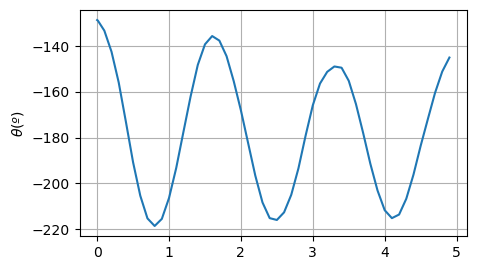

In [53]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot(env2.model.Time, np.rad2deg(env2.model.get_values('theta')), label=f'$\theta$')
axes.grid()
axes.set_ylabel('$\\theta (º)$')

Text(0, 0.5, '$\\theta (º)$')

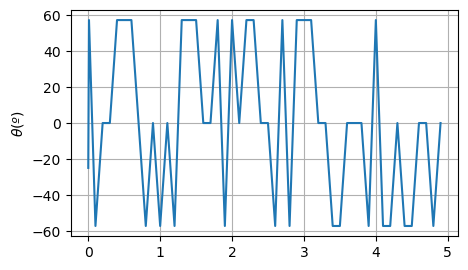

In [45]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot(env2.model.Time, np.rad2deg(env2.model.get_values('tau')), label=f'$\theta$')
axes.grid()
axes.set_ylabel('$\\theta (º)$')

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [9]:
env = env

states = env.observation_space.shape[0]
actions = env.action_space.shape[0]
actions

1

In [10]:
model = build_model(states, actions)

In [11]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [12]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn


from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

model = build_model(states, actions)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [13]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


IndexError: invalid index to scalar variable.